# 참고

[프로그래머를 위한 베이지안 with 파이썬](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

In [2]:
# import os
# import io
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import scipy.stats as stats

In [ ]:
베타연속확률변수 = stats.beta

동전을던진횟수들 = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

# 동전 던지기 결과
동전던지기확률 = 0.5
베르누이이산확률변수 =  stats.bernoulli.rvs(동전던지기확률, size=동전을던진횟수들[-1])

# 사전분포
_0부터1까지일정한간격의100개의숫자 = np.linspace(0, 1, 100)

# 사후분포, 동전 던지기 결과로 업데이트한 분포 
동전을던진횟수 = 7
앞면이나온횟수 = 베르누이이산확률변수[:동전을던진횟수들[동전을던진횟수]].sum()
뒷면이나온횟수 = 동전을던진횟수들[동전을던진횟수] - 앞면이나온횟수
베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수)

In [ ]:
동전을던진횟수 = 7

앞면이나온횟수 = 베르누이이산확률변수[:동전을던진횟수들[동전을던진횟수]].sum()

뒷면이나온횟수 = 동전을던진횟수들[동전을던진횟수] - 앞면이나온횟수
베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수)

array([0.00000000e+00, 8.24807497e-14, 3.97096914e-11, 1.43454718e-09,
       1.79422829e-08, 1.25456540e-07, 6.07092811e-07, 2.27827146e-06,
       7.09666627e-06, 1.91705153e-05, 4.62739087e-05, 1.01959183e-04,
       2.08325712e-04, 3.99463427e-04, 7.25541103e-04, 1.25745715e-03,
       2.09191745e-03, 3.35675429e-03, 5.21625489e-03, 7.87623156e-03,
       1.15885381e-02, 1.66547230e-02, 2.34285076e-02, 3.23167905e-02,
       4.37789057e-02, 5.83238980e-02, 7.65056374e-02, 9.89156483e-02,
       1.26173607e-01, 1.58915540e-01, 1.97779822e-01, 2.43391197e-01,
       2.96343064e-01, 3.57178425e-01, 4.26369901e-01, 5.04299327e-01,
       5.91237469e-01, 6.87324459e-01, 7.92551560e-01, 9.06744878e-01,
       1.02955165e+00, 1.16042965e+00, 1.29864035e+00, 1.44324615e+00,
       1.59311223e+00, 1.74691321e+00, 1.90314487e+00, 2.06014092e+00,
       2.21609482e+00, 2.36908636e+00, 2.51711272e+00, 2.65812350e+00,
       2.79005899e+00, 2.91089113e+00, 3.01866602e+00, 3.11154732e+00,
      

In [8]:
sum(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수))

np.float64(98.99999999996777)

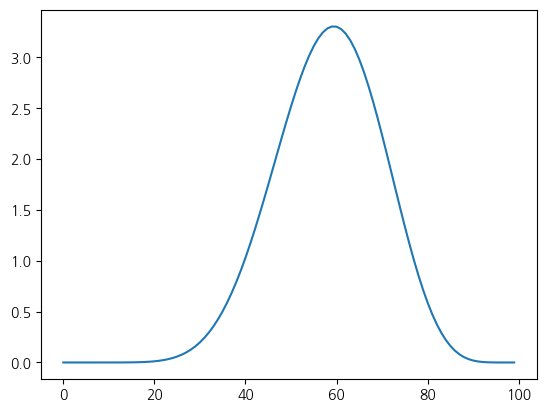

In [6]:
plt.plot(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수))

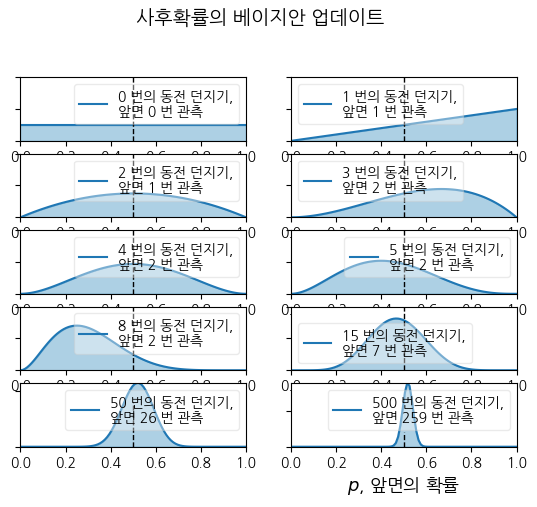

<Figure size 4000x2000 with 0 Axes>

In [8]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials) / 2), 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)
plt.figure(figsize=(40, 20))
plt.tight_layout()